In [39]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import linear, logarithmic, cubic, sigmoid, transform_function, sum_transformed_functions



In [40]:
# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available:", gpus)
else:
    print("No GPU available, using CPU.")


No GPU available, using CPU.


In [41]:
# --- 1. Load the CSV dataset ---
csv_filename = "transformed_functions_dataset.csv"  # update path if needed
df = pd.read_csv(csv_filename)


In [42]:
# Identify feature columns (summed function values) and target columns (transformation parameters)
feature_columns = [col for col in df.columns if col.startswith("f_")]
target_columns = [
    "Linear_A", "Linear_B", "Linear_C",
    "Logarithmic_A", "Logarithmic_B", "Logarithmic_C",
    "Cubic_A", "Cubic_B", "Cubic_C",
    "Sigmoid_A", "Sigmoid_B", "Sigmoid_C"
]

In [43]:
# Extract features (X) and targets (y)
X = df[feature_columns].values    # shape: (num_samples, 1000)
y = df[target_columns].values       # shape: (num_samples, 12)

# --- 2. Split the Data into Train, Validation, and Test Sets ---
# First split: 70% train, 30% temporary (for validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Second split: split temporary set equally into validation and test (15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (14000, 1000) (14000, 12)
Validation set shape: (3000, 1000) (3000, 12)
Test set shape: (3000, 1000) (3000, 12)


In [44]:
# --- 3. Build the Model ---
# This model takes a 1000-dimensional input and outputs 12 continuous parameters.
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),  # input: 1000 features
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='linear')   # output: 12 parameters
])


# model = Sequential([
#     InputLayer(input_shape=(1000,)),  # assuming 1000 input features
#     Dense(128, activation='relu'),
#     Dropout(0.2),                     # added dropout layer
#     BatchNormalization(),             # added batch normalization layer
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(12, activation='linear')     # output layer with 12 units for regression
# ])

# Compile the model with Mean Squared Error loss and the Adam optimizer.
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()


c:\Users\97254\Desktop\niv\Deep learning\OREN_PIPES\OREN_PIPES\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,860 (542.42 KB)

 Trainable params: 138,860 (542.42 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:

# --- 4. Train the Model ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,
    batch_size=32
)


Epoch 1/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 835.8845 - mae: 13.5985 - val_loss: 118.4118 - val_mae: 7.0515
Epoch 2/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 121.1827 - mae: 7.2284 - val_loss: 111.1838 - val_mae: 6.7407
Epoch 3/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 116.1876 - mae: 7.0666 - val_loss: 111.5358 - val_mae: 6.9365
Epoch 4/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115.1558 - mae: 7.0781 - val_loss: 109.3921 - val_mae: 6.8052
Epoch 5/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108.1418 - mae: 6.7728 - val_loss: 115.5553 - val_mae: 7.0810
Epoch 6/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 107.9468 - mae: 6.7322 - val_loss: 102.2717 - val_mae: 6.5925
Epoch 7/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99.7129 - mae: 6.4385 - val_loss: 104.0930 - val_mae: 7.0837
Epoch 8/1000
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95.5021 - mae: 6.3324 - val_loss: 83.7163 - val_mae: 5.7387
Epoch 9/10

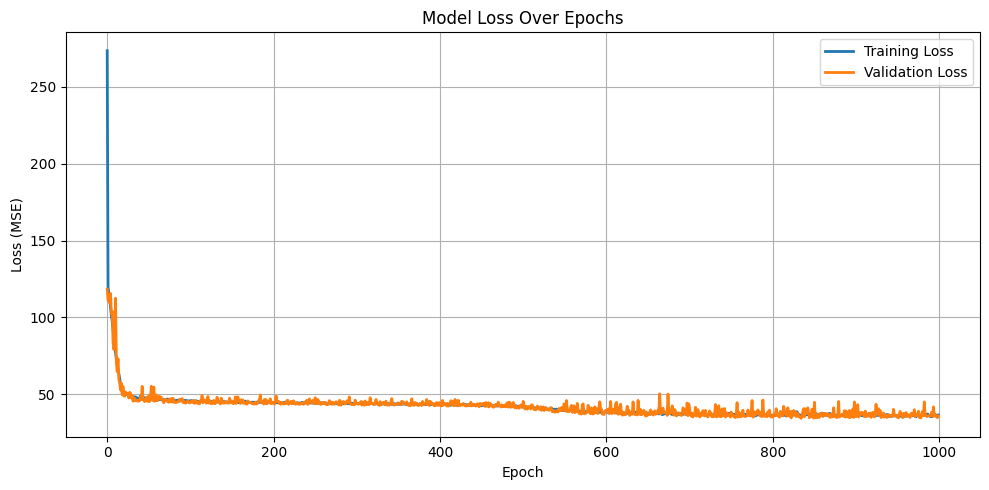

In [46]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# --- 5. Evaluate the Model on the Test Set ---
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")



94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.8746 - mae: 3.9165
Test Loss: 36.0813, Test MAE: 3.9317


In [48]:
# --- 6. Save the Model ---
model.save("parameter_prediction_model.keras")
print("Model saved as 'parameter_prediction_model.keras'")

Model saved as 'parameter_prediction_model.keras'


### INFERENCE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


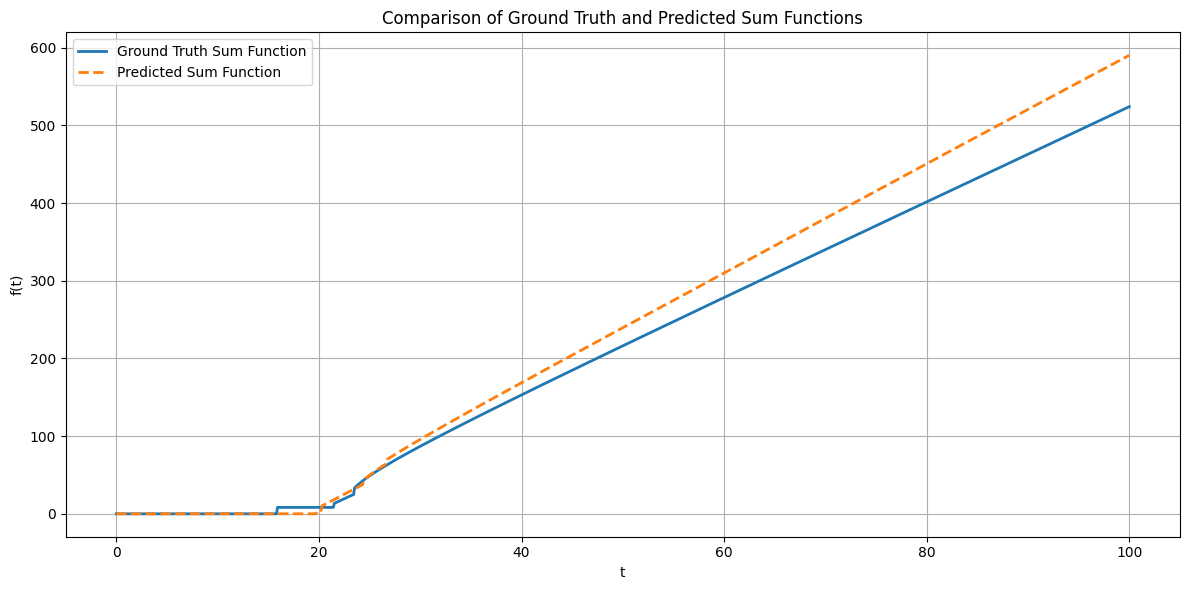

In [51]:

# --- Define the time axis ---
t = np.linspace(0, 100, 1000)

functions = {
    'Linear': linear,
    'Logarithmic': logarithmic,
    'Cubic': cubic,
    'Sigmoid': sigmoid
}

# --- Helper to reconstruct the sum function given a dictionary of parameters ---
def generate_sum_function(param_dict):
    """
    Given a dictionary with parameters for each function (keys like 'Linear_A', etc.),
    this function generates the summed signal over time.
    """
    sum_signal = np.zeros_like(t)
    for f_name, func in functions.items():
        A = param_dict[f"{f_name}_A"]
        B = param_dict[f"{f_name}_B"]
        C = param_dict[f"{f_name}_C"]
        _, y = transform_function(func, t, A, B, C)
        sum_signal += y
    return sum_signal

# --- List of parameter names (order must match training order) ---
param_names = [
    "Linear_A", "Linear_B", "Linear_C",
    "Logarithmic_A", "Logarithmic_B", "Logarithmic_C",
    "Cubic_A", "Cubic_B", "Cubic_C",
    "Sigmoid_A", "Sigmoid_B", "Sigmoid_C"
]

# --- Load your test data and model ---
# For this example, assume X_test and y_test have already been defined
# (They are NumPy arrays extracted from your CSV after splitting.)
# If not, you could load the CSV and split it as shown in previous code.

# Load the trained model
model = tf.keras.models.load_model("parameter_prediction_model.keras")

# --- Pick a test sample for inference ---
sample_index = 10  # or any index from 0 to len(X_test)-1
x_sample = X_test[sample_index:sample_index+1]  # shape (1, num_features)
true_params = y_test[sample_index]  # shape (12,)

# Get the predicted parameters for the sample
predicted_params = model.predict(x_sample)[0]  # shape (12,)

# Map predicted and true parameter vectors to dictionaries
predicted_dict = {name: predicted_params[i] for i, name in enumerate(param_names)}
true_dict = {name: true_params[i] for i, name in enumerate(param_names)}

# --- Reconstruct the summed functions ---
y_predicted = generate_sum_function(predicted_dict)
y_true = generate_sum_function(true_dict)

# --- Plot the Ground Truth vs Predicted Sum Functions ---
plt.figure(figsize=(12, 6))
plt.plot(t, y_true, label="Ground Truth Sum Function", linewidth=2)
plt.plot(t, y_predicted, label="Predicted Sum Function", linestyle="--", linewidth=2)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Comparison of Ground Truth and Predicted Sum Functions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

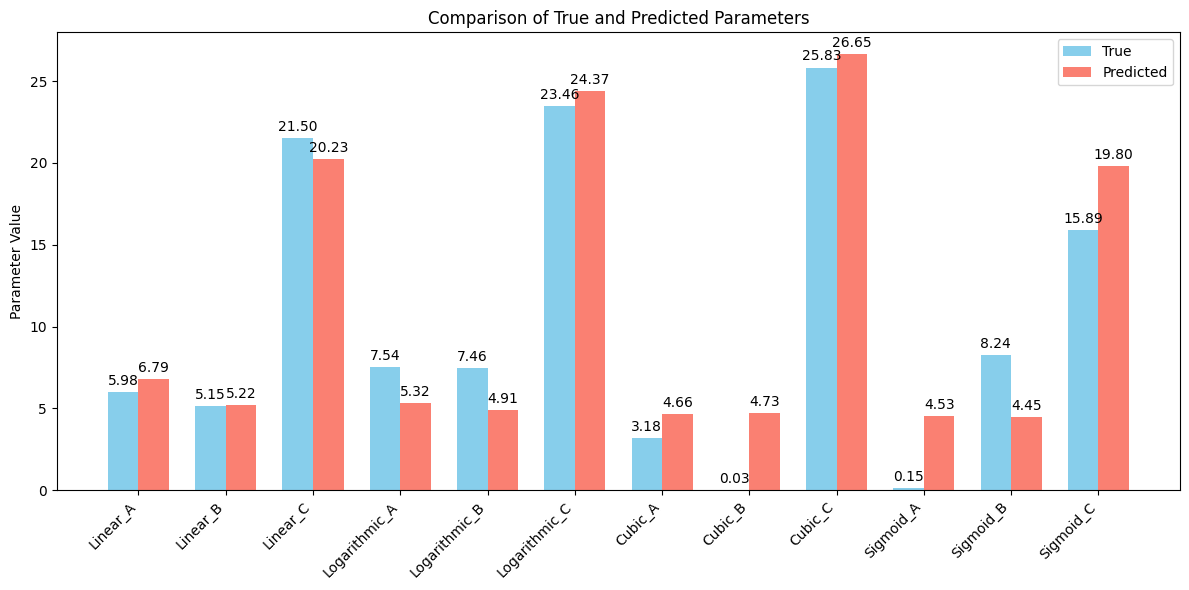

In [52]:
# Extract predicted and true parameter values in the same order
predicted_vals = [predicted_dict[name] for name in param_names]
true_vals = [true_dict[name] for name in param_names]

# Create positions for each parameter on the x-axis
x = np.arange(len(param_names))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects_true = ax.bar(x - width/2, true_vals, width, label='True', color='skyblue')
rects_pred = ax.bar(x + width/2, predicted_vals, width, label='Predicted', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Parameter Value')
ax.set_title('Comparison of True and Predicted Parameters')
ax.set_xticks(x)
ax.set_xticklabels(param_names, rotation=45, ha='right')
ax.legend()

# Optionally add labels to the bars (for clarity)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects_true)
autolabel(rects_pred)

plt.tight_layout()
plt.show()